In [3]:
import os 
import numpy as np
from utils.data_utils import load_obj, SAVE_DIR, UD_PARENT, RESULTS_DIR, LEX_PATH_SET, save_obj
from utils import extract_pool
from utils.optim_utils import optim_pool
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn
from tqdm import tqdm 
import pandas as pd 

In [4]:
extract_id=['group=best_performing_pereira_1-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False',
            'group=best_performing_pereira_2-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False',
            'group=best_performing_pereira_3-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False',
            'group=best_performing_pereira_4-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False',
            'group=best_performing_pereira_5-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False']

#Pereira_control=['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp1-bench=Pereira2018-encoding-weights-ave=False',
#                'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp2-bench=Pereira2018-encoding-weights-ave=False']

#'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
#'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
#'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False',

#control=['group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
#'group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False',
#'group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False']

In [5]:
#extract_id=['group=set_3-dataset=ud_sentences_filter_v2-brain_resp-bench=Fedorenko2016v3-encoding-weights_v2-ave=False',
#           'group=set_3-dataset=ud_sentences_filter_v2-network_act-bench=None-ave=False']
optim_id=['coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=2']

In [6]:
optim_files=[]
optim_results=[]
for ext in extract_id:
    for optim in optim_id:
        optim_file=os.path.join(RESULTS_DIR,f"results_{ext}_{optim}.pkl")
        optim_files.append(optim_file)
        optim_results.append(load_obj(optim_file))

loading /Users/eghbalhosseini/MyData/sent_sampling/results/results_group=best_performing_pereira_1-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=2.pkl
loading /Users/eghbalhosseini/MyData/sent_sampling/results/results_group=best_performing_pereira_2-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=2.pkl
loading /Users/eghbalhosseini/MyData/sent_sampling/results/results_group=best_performing_pereira_3-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=2.pkl
loading /Users/eghbalhosseini/MyData/sent_sampling/results/results_group=best_performing_pereira_4-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=2.pkl
loading /Users/eghbalhosseini/MyData/sent_sampling/results/results_g

1.09677
1.09758
1.09530
1.09840
1.09673


/Users/eghbalhosseini/anaconda3/envs/neural-nlp-master/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


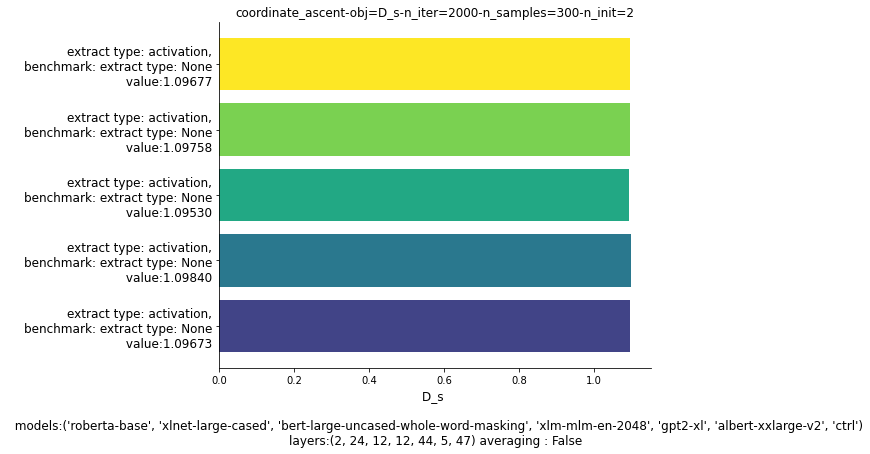

In [26]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])

cmap=cm.get_cmap('viridis_r')

alph_col=cmap(np.divide(range(len(optim_results)),len(optim_results)))
tick_l=[]
tick=[]
for idx, res in enumerate(optim_results):
    ax.barh(idx,res['optimized_d'],color=alph_col[[idx],:],label=res['optimizatin_name'])
    ext_obj=extract_pool[res['extractor_name']]()
    str_val="{:.5f}".format(res['optimized_d'])
    print(f"{str_val}")
    tick_l.append(f"extract type: {ext_obj.extract_type},\nbenchmark: extract type: {ext_obj.extract_benchmark}\n value:{str_val}")
    tick.append(idx)


ax.set_xlabel(f"D_s \n\n  models:{ext_obj.model_spec}\nlayers:{ext_obj.layer_spec} averaging : {ext_obj.average_sentence}",fontsize=12)
ax.set_yticklabels(tick_l,fontsize=12)
ax.set_yticks(tick)
ax.set_title(res['optimizatin_name'],fontsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.legend(bbox_to _anchor=(1.1, .85), frameon=True,fontsize=12)
ax.invert_yaxis()
#fig.savefig(os.path.join(Analysis_path,'DV_test_gamma_alpha_is_0.pdf'))

In [22]:
str_val="{:.5f}".format(res['optimized_d'])

'1.09673'

In [ ]:
xy_val=[[len(set(x['optimized_S']).intersection(set(y['optimized_S']))) for y in optim_results] for x in optim_results ]
x_cord=[[(idx,f"{x['extractor_name']}\n{x['data_type']}\n") for y in optim_results] for idx, x in enumerate(optim_results) ]
y_cord=[[(idy,f"{x['data_type']}\n{x['optimizatin_name']}") for idy,y in enumerate(optim_results)] for x in optim_results ]
x_cord1=[x[0] for x in x_cord]
y_cord1=y_cord[0]

In [ ]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])
cmap=cm.get_cmap('viridis_r')
tick_l=[]
tick=[]
im=ax.imshow(np.stack(xy_val))
ytick=[y[0] for y in y_cord1]
yticklabel=[y[1] for y in y_cord1]

xtick=[x[0] for x in x_cord1]
xticklabel=[x[1] for x in x_cord1]

ax.set_xticks(xtick)
ax.set_xticklabels(xticklabel,rotation = 90)

ax.set_yticks(xtick)
ax.set_yticklabels(xticklabel,rotation = 0)
fig.colorbar(im , orientation='vertical')

for i in range(np.stack(xy_val).shape[0]):
    for j in range(np.stack(xy_val).shape[1]):
        text = ax.text(j, i, np.stack(xy_val)[i,j],
                       ha="center", va="center", color="w",fontsize=18)



In [ ]:
np.stack(xy_val)

In [ ]:
lex_names=[x['name'] for x in LEX_PATH_SET]
sample_values=[]
for idx, res in enumerate(optim_results):
    ext_obj=extract_pool[res['extractor_name']]()
    ext_obj.load_dataset()
    lex_values=[[np.nanmean(sent_dat[lex_name]) for lex_name in lex_names] for sent_dat in ext_obj.data_]
    values=[lex_values[id] for id in res['optimized_S']]
    sample_values.append(np.stack(values))

In [ ]:
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
for i in range(1, len(lex_names)+1):
    plt.subplot(4, 2, i)
    
    seaborn.distplot(np.stack(lex_values)[:,i-1],bins=50,label='full',norm_hist=True,hist=False,kde_kws={"lw": 5,"color":'k'})
    for idx,val in enumerate(sample_values):
        optim_spec=optim_results[idx]['optimizatin_name'].split('-')
        name=f"{optim_results[idx]['benchmark']}\n{optim_results[idx]['data_type']}"
        seaborn.distplot(val[:,i-1],bins=50,label=name,norm_hist=True,hist=False,kde_kws={"lw": 3})   
    #seaborn.distplot(select_s_feat_mean_new[i-1],bins=50,label='sample',norm_hist=True)
    #ax=plt.gca()
    #ax.set_xticks(np.linspace(s_with_all_feat[i-1].min(),s_with_all_feat[i-1].max(),num=10))
    random_set=np.random.randint(0,np.stack(lex_values).shape[0],200)
    seaborn.distplot(np.stack(lex_values)[random_set,i-1],bins=50,label='random',norm_hist=True,hist=False,kde_kws={"lw": 2,"color": (.5,.5,.5)})
    if i==len(lex_names):
        plt.legend(loc='upper right')
    plt.ylabel(lex_names[i-1],fontsize=14);


# compute the predicted brain based on neural activation list

In [ ]:
benmarks=[x['benchmark'] for x in optim_results]
data_type=[x['data_type'] for x in optim_results]

In [ ]:
extract_id=['group=best_performing_pereira-dataset=ud_sentencez_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
'group=best_performing_pereira-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False',
'group=best_performing_pereira-dataset=ud_sentencez_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False'
]

Pereira_control=['group=best_performing_pereira-dataset=ud_sentencez_token_filter_v3-brain_resp_Pereira_exp1-bench=Pereira2018-encoding-weights-ave=False',
                'group=best_performing_pereira-dataset=ud_sentencez_token_filter_v3-brain_resp_Pereira_exp2-bench=Pereira2018-encoding-weights-ave=False']


In [ ]:
ds_transform=[dict(src='group=best_performing_pereira-dataset=ud_sentencez_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
                  trgs=['group=best_performing_pereira-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False',
                      'group=best_performing_pereira-dataset=ud_sentencez_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False'],
                  optim='coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1'),
              dict(src='group=best_performing_pereira-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False',
                   trgs=['group=best_performing_pereira-dataset=ud_sentencez_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False',
                       'group=best_performing_pereira-dataset=ud_sentencez_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False'],
                  optim='coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1'),
              
             dict(src='group=best_performing_pereira-dataset=ud_sentencez_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False',
                  trgs=['group=best_performing_pereira-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False',
                      'group=best_performing_pereira-dataset=ud_sentencez_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False'],
                  optim='coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1'),
]


In [ ]:
ds_transform=[dict(src='group=best_performing_pereira_1-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False',
                  trgs=['group=best_performing_pereira_2-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False',
                      'group=best_performing_pereira_3-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False',
                       'group=best_performing_pereira_4-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False',
                       'group=best_performing_pereira_5-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False'],
                  optim='coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=2'),
              dict(src='group=best_performing_pereira_2-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False',
                  trgs=['group=best_performing_pereira_1-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False',
                      'group=best_performing_pereira_3-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False',
                       'group=best_performing_pereira_4-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False',
                       'group=best_performing_pereira_5-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False'],
                  optim='coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=2'),
           
]


In [ ]:
PAIR_COMPARISON=[]
for idx, ds_t in enumerate(ds_transform):
    result=dict()
    result['idx']=idx
    optim_file=os.path.join(RESULTS_DIR,f"results_{ds_t['src']}_{ds_t['optim']}.pkl")
    res=load_obj(optim_file)
    ext_obj=extract_pool[res['extractor_name']]()
    ext_obj.load_dataset()
    ext_obj()
    optimizer_obj = optim_pool[ds_t['optim']]()
    optimizer_obj.load_extractor(ext_obj)
    ds_src=optimizer_obj.mod_objective_function(res['optimized_S'])
    result[f"SRC: {res['data_type']}; {res['benchmark']}"]=ds_src
    # 
    for trg in ds_t['trgs']:
            optim_file=os.path.join(RESULTS_DIR,f"results_{trg}_{optim}.pkl")
            res_trg=load_obj(optim_file)
            ds_trg=optimizer_obj.mod_objective_function(res_trg['optimized_S'])
            result[f"TRG: {res_trg['data_type']}; {res_trg['benchmark']}"]=ds_trg
    # get the random set
    ds_rand=[]
    for k in tqdm(enumerate(range(50))):
        sent_random=list(np.random.choice(optimizer_obj.N_S,optimizer_obj.N_s))
        ds_rand.append(optimizer_obj.mod_objective_function(sent_random))
    result[f"RND: {res['data_type']}; {res['benchmark']}"]=ds_rand
    PAIR_COMPARISON.append(result)

In [ ]:
Pereira_rand=PAIR_COMPARISON[0]['RND: brain_resp; Pereira2018-encoding-weights']

In [ ]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])
cmap=cm.get_cmap('viridis_r')
alph_col=cmap(np.divide(range(len(PAIR_COMPARISON)),len(PAIR_COMPARISON)))
tick_l=[]
tick=[]
src_tick=[]
src_tick_l=[]
alph_col1=alph_col[(1,0),:]
for idx, pair in enumerate([PAIR_COMPARISON[0]]):
    ds_t=ds_transform[pair['idx']]
    optim_file=os.path.join(RESULTS_DIR,f"results_{ds_t['src']}_{ds_t['optim']}.pkl")
    res=load_obj(optim_file)
    src=[pair[f"SRC: {res['data_type']}; {res['benchmark']}"]]
    src_tick_l.append(f"SRC: {res['data_type']}; {res['benchmark']}")
    for trg in ds_t['trgs']:
        optim_file=os.path.join(RESULTS_DIR,f"results_{trg}_{optim}.pkl")
        res_trg=load_obj(optim_file)
        pair[f"TRG: {res_trg['data_type']}; {res_trg['benchmark']}"]
        src.append(pair[f"TRG: {res_trg['data_type']}; {res_trg['benchmark']}"])
        src_tick_l.append(f"TRG: {res_trg['data_type']}; {res_trg['benchmark']}")
    ax.barh(np.arange(len(src))+idx*5,src,edgecolor=(0,0,0),color=alph_col1[idx,:])
    
    ax.set_yticklabels(src_tick)
    # random set 
    src_rand=pair[f"RND: {res['data_type']}; {res['benchmark']}"]
    src_tick_l.append(f"RND: {res['data_type']}; {res['benchmark']}")
    ax.barh(len(src)+idx*5,np.mean(src_rand),xerr=np.std(src_rand),color=(1,1,1),edgecolor=(0,0,0))
    

    src_tick.append(np.arange(len(src)+1)+idx*5)
ax.invert_yaxis()
    
ax.set_xlabel('D_s')
ax.set_yticks(np.array(src_tick).flatten())
ax.set_yticklabels(src_tick_l,fontsize=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.set
#ax.spines["top"].set_visible(False)
#ax.spines["right"].set_visible(False)
#ax.legend(bbox_to_anchor=(1.1, .85), frameon=True,fontsize=12)
#fig.savefig(os.path.join(Analysis_path,'DV_test_gamma_alpha_is_0.pdf'))

# control 1 

In [ ]:
extract_group=[['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
            'group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False'],
            ['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
             'group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False'],
['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False',

'group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False']]

Pereira_control=['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp1-bench=Pereira2018-encoding-weights-ave=False',
                'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp2-bench=Pereira2018-encoding-weights-ave=False']

#'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
#'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
#'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False',

control=['group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
'group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False',
'group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False']

In [ ]:
optim_files=[]
optim_group=[]
for ext in extract_group:
    optim_results=[]
    for ex in ext:
        for optim in optim_id:
            optim_file=os.path.join(RESULTS_DIR,f"results_{ex}_{optim}.pkl")
            optim_files.append(optim_file)
            optim_results.append(load_obj(optim_file))
        
    optim_group.append(optim_results)

In [ ]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])

cmap=cm.get_cmap('viridis_r')

alph_col=cmap(np.divide(range(len(optim_group)),len(optim_group)))
tick_l=[]
tick=[]
for idx, results in enumerate(optim_group):
    group_res=[]
    for res in results:
        group_res.append(res['optimized_d'])

        
        
    #pair[f"TRG: {res_trg['group']}; {res_trg['benchmark']}"]
    #    src.append(pair[f"TRG: {res_trg['data_type']}; {res_trg['benchmark']}"])
        tick_l.append(res['extractor_name'])
        tick
    ax.barh(np.arange(len(group_res))+idx*5,group_res,edgecolor=(0,0,0),color=alph_col[idx,:])
    tick.append(np.arange(len(group_res))+idx*5)
    #ax.barh(idx,res['optimized_d'],color=alph_col[[idx],:],label=res['optimizatin_name'])
    #ext_obj=extract_pool[res['extractor_name']]()
    #tick_l.append(f"extract type: {ext_obj.extract_type},\nbenchmark: extract type: {ext_obj.extract_benchmark}")
    #tick.append(idx)
ax.invert_yaxis()
    
ax.set_xlabel('D_s')
ax.set_yticks(np.array(tick).flatten())
ax.set_yticklabels(tick_l,fontsize=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

    
#ax.set_xlabel(f"D_s \n\n  models:{ext_obj.model_spec}\nlayers:{ext_obj.layer_spec} averaging : {ext_obj.average_sentence}",fontsize=12)
#ax.set_yticklabels(tick_l,fontsize=12)
#ax.set_yticks(tick)
#ax.set_title(res['optimizatin_name'],fontsize=12)
#ax.spines["top"].set_visible(False)
#ax.spines["right"].set_visible(False)
#ax.legend(bbox_to _anchor=(1.1, .85), frameon=True,fontsize=12)
#ax.invert_yaxis()
#fig.savefig(os.path.join(Analysis_path,'DV_test_gamma_alpha_is_0.pdf'))

# control 2: inidividual Pereira results 

In [ ]:
Pereira_control=['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
    'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp1-bench=Pereira2018-encoding-weights-ave=False',
                'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp2-bench=Pereira2018-encoding-weights-ave=False']

In [ ]:
optim_files=[]
optim_results=[]
for ext in Pereira_control:
    for optim in optim_id:
        optim_file=os.path.join(RESULTS_DIR,f"results_{ext}_{optim}.pkl")
        optim_files.append(optim_file)
        optim_results.append(load_obj(optim_file))

In [ ]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])

cmap=cm.get_cmap('Greys')

alph_col=np.flipud(cmap(np.divide(range(len(optim_results)+2),len(optim_results)+2)))
tick_l=[]
tick=[]
for idx, res in enumerate(optim_results):
    ax.barh(idx,res['optimized_d'],color=alph_col[[idx],:],label=res['optimizatin_name'])
    ext_obj=extract_pool[res['extractor_name']]()
    tick_l.append(f"extract name: {ext_obj.extract_name},\nbenchmark: extract type: {ext_obj.extract_benchmark}")
    tick.append(idx)

ax.barh(len(optim_results),np.mean(Pereira_rand),xerr=np.std(Pereira_rand),color=(1,1,1),edgecolor=(0,0,0),label=res['optimizatin_name'])
tick_l.append(f"random samples")
tick.append(len(optim_results))
    
ax.set_xlabel(f"D_s \n\n  models:{ext_obj.model_spec}\nlayers:{ext_obj.layer_spec} averaging : {ext_obj.average_sentence}",fontsize=12)
ax.set_yticklabels(tick_l,fontsize=12)
ax.set_yticks(tick)
ax.set_title(res['optimizatin_name'],fontsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Example sentences : 

In [ ]:

for idx, res in enumerate(optim_results):
    select_sent=[]
    values=[]
    ext_obj=extract_pool[res['extractor_name']]()
    ext_obj.load_dataset()
    [values.append([id, ext_obj.data_[id]['text']]) for id in np.sort(res['optimized_S'])]
    with open(os.path.join(RESULTS_DIR,f"sentences_{res['extractor_name']}_{res['optimizatin_name']}.txt"), 'w') as f:
        for item in values:
            f.write("%d, %s\n" % (item[0],item[1]))


In [ ]:
os.path.join(RESULTS_DIR,f"sentences_{res['extractor_name']}_{res['optimizatin_name']}.txt")

In [ ]:
"%d, %s\n" % item[0],item[1]

In [ ]:
all_sentences=[]
select_sent=[]
sentences=[]
sentence_id=[]
sentence_location=[]
for idx, res in enumerate(optim_results):
    ext_obj=extract_pool[res['extractor_name']]()
    ext_obj.load_dataset()
    sentences.append([ext_obj.data_[x]['text'] for x in np.sort(res['optimized_S'])])
    sentence_location.append(np.sort(np.sort(res['optimized_S'])))
    #all_sentences.append(values)

In [ ]:
sentence_location_flat=[item for sublist in sentence_location for item in sublist]

In [ ]:
unique_sentence_location=list(set(sentence_location_flat))

In [ ]:
colB=[[idx+1 for idx, y in enumerate(sentence_location) if x in y] for x in unique_sentence_location]
colC=[len(x) for x in colB]

In [ ]:
colC_sort_idx=np.flipud(np.argsort(np.asarray(colC)))

In [ ]:
colB_sort=[colB[x] for x in colC_sort_idx]

In [ ]:
sentence_flat=[item for sublist in sentences for item in sublist]


In [ ]:
test=list(set(sentence_flat))

In [ ]:
[sentence_flat[x] for x in unique_sentence_location]

In [ ]:
ColA=[ext_obj.data_[x]['text'] for x in unique_sentence_location]

In [ ]:
colB_sort=[colB[x] for x in colC_sort_idx]
colA_sort=[ColA[x] for x in colC_sort_idx]
colC_sort=[colC[x] for x in colC_sort_idx]

In [ ]:
df2 = pd.DataFrame(data=dict(sentence=ColA,set_num=colB,n_sets=colC))
df2_sort = pd.DataFrame(data=dict(sentence=colA_sort,set_num=colB_sort,n_sets=colC_sort))

In [ ]:
with open(os.path.join(RESULTS_DIR,f"sentences_group=best_performing_pereira_1_through_5-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False_1_{res['optimizatin_name']}.csv"), 'w') as f:
    df2_sort.to_csv(f)   


In [ ]:
df2_sort

# Read Ev's file 

In [2]:
file_name='U01_sentselection_Dec18-2020_updDec23.xlsx'
df_ev_selected=pd.read_excel(os.path.join(RESULTS_DIR,f"{file_name}"))

In [3]:
df_ev_selected

,Unnamed: 0,sentence,set_num,n_sets,previously_selected_by_ev,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,0,"Failing in Syria, the Americans went to work i...","[1, 2, 3, 4, 5]",5,0,NaN,NaN,NaN,NaN,200.0
1,2,They wanted no excuse for being there. They we...,"[1, 2, 3, 4, 5]",5,0,NaN,NaN,NaN,NaN,NaN
2,3,fyi... it sound like Bobby is in serious condi...,"[1, 2, 3, 4, 5]",5,0,NaN,NaN,NaN,NaN,NaN
3,4,Let me know your thoughts....then I will run i...,"[1, 2, 3, 4, 5]",5,0,NaN,NaN,NaN,NaN,NaN
4,5,This step will reapportion years of your life ...,"[1, 2, 3, 4, 5]",5,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
707,699,"As you can see from the Design Document, they ...",[5],1,?,NaN,NaN,NaN,NaN,NaN
708,704,I declare the first international Olympic game...,[4],1,?,NaN,NaN,NaN,NaN,NaN
709,705,"even if they did, our risk is limited to the p...",[2],1,?,NaN,NaN,NaN,NaN,NaN
710,707,"From the first pad, many more will form.",[2],1,?,NaN,NaN,NaN,NaN,NaN


In [4]:
ev_sentences=df_ev_selected.sentence[df_ev_selected.previously_selected_by_ev==1]
ev_sentences


304     Or they weren't eyewitnesses and are just lying.
305           Kerry saved a man's life while under fire.
306     I know now where to get all of my wine and beer.
307        You'll have to tell me what it's about first.
308    The next day, no one could find my wheel lock ...
                             ...                        
538    They are sick of the partisanship and nonsense...
546    Driving into the city centre itself is somethi...
583    The proposal put forward by the Commission is ...
606    A blinding sunlight drowned all this at times ...
629    I am not going to go pick up a horse I can't a...
Name: sentence, Length: 200, dtype: object

In [6]:
# save individual sentences 
individual_sent_dir='/Users/eghbalhosseini/MyData/ecog_DNN/U01_Expt6_ANNsentSET1/sentences_txt/'

for idx, res in enumerate(ev_sentences):
    
    with open(os.path.join(individual_sent_dir,f"sentence_{idx+1}.txt"), 'w') as f:
        f.write("%s" % res)

In [9]:
ds_transform=[dict(src='group=best_performing_pereira_1-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False',
                  optim='coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=2')]


In [10]:

for idx, ds_t in enumerate(ds_transform):
    result=dict()
    optim_file=os.path.join(RESULTS_DIR,f"results_{ds_t['src']}_{ds_t['optim']}.pkl")
    res=load_obj(optim_file)
    ext_obj=extract_pool[res['extractor_name']]()
    ext_obj.load_dataset()
    ext_obj()
    optimizer_obj = optim_pool[ds_t['optim']]()
    optimizer_obj.load_extractor(ext_obj)
    ds_src=optimizer_obj.mod_objective_function(res['optimized_S'])
    result[f"originial"]=ds_src
    sentences=[x['text'] for x in ext_obj.data_]
    ev_sent_id=([sentences.index(ev_sent) for ev_sent in ev_sentences])
    ds_ev=optimizer_obj.mod_objective_function(ev_sent_id)
    result[f"filtering by Ev"]=ds_ev
    # 
    # get the random set 
    ds_rand=[]
    for k in tqdm(enumerate(range(50))):
        sent_random=list(np.random.choice(optimizer_obj.N_S,optimizer_obj.N_s))
        ds_rand.append(optimizer_obj.mod_objective_function(sent_random))
    result[f"random"]=ds_rand


loading /Users/eghbalhosseini/MyData/sent_sampling/results/results_group=best_performing_pereira_1-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=2.pkl
loading /Users/eghbalhosseini/MyData/Universal Dependencies 2.6/ud_sentencez_data_token_filter_v3_no_dup.pkl


934it [00:00, 222710.63it/s]
934it [00:00, 229656.46it/s]
935it [00:00, 224275.09it/s]
934it [00:00, 221689.77it/s]
934it [00:00, 215601.54it/s]
935it [00:00, 221513.46it/s]
934it [00:00, 222647.34it/s]
934it [00:00, 221702.32it/s]
935it [00:00, 221563.52it/s]


extracting network activations for roberta-base
ud_sentencez_token_filter_v3_roberta-base_layer_2_activation_ave_False.pkl already exists, loading...
loading /Users/eghbalhosseini/MyData/sent_sampling/ud_sentencez_token_filter_v3_roberta-base_layer_2_activation_ave_False.pkl
adding activations to set
extracting network activations for xlnet-large-cased
ud_sentencez_token_filter_v3_xlnet-large-cased_layer_24_activation_ave_False.pkl already exists, loading...
loading /Users/eghbalhosseini/MyData/sent_sampling/ud_sentencez_token_filter_v3_xlnet-large-cased_layer_24_activation_ave_False.pkl
adding activations to set
extracting network activations for bert-large-uncased-whole-word-masking
ud_sentencez_token_filter_v3_bert-large-uncased-whole-word-masking_layer_12_activation_ave_False.pkl already exists, loading...
loading /Users/eghbalhosseini/MyData/sent_sampling/ud_sentencez_token_filter_v3_bert-large-uncased-whole-word-masking_layer_12_activation_ave_False.pkl
adding activations to set


50it [00:26,  1.88it/s]


Text(0.5, 1.0, 'sentence from U01_sentselection_Dec18-2020_updDec23.xlsx')

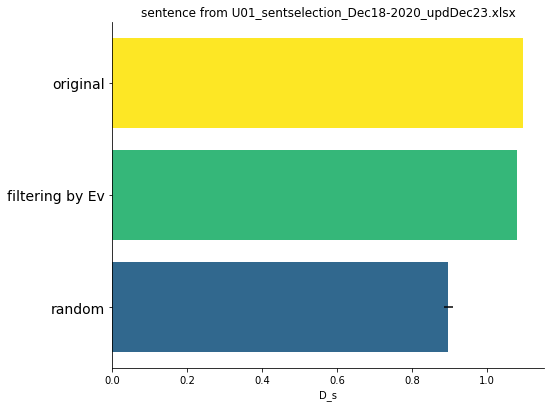

In [14]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])

cmap=cm.get_cmap('viridis_r')

alph_col=cmap(np.divide(range(len(result)),len(result)))
tick_l=[]


ax.barh(0,result['originial'],color=alph_col[[0],:],label='originial')
tick_l.append('original')
ax.barh(1,result['filtering by Ev'],color=alph_col[[1],:],label='filtering by Ev')
tick_l.append('filtering by Ev')

ax.barh(2,np.mean(result['random']),xerr=np.std(result['random']),color=alph_col[[2],:],label='random')
tick_l.append('random')

ax.invert_yaxis()
    
ax.set_xlabel('D_s')
ax.set_yticks([0,1,2])
ax.set_yticklabels(tick_l,fontsize=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title(f"sentence from {file_name}")


In [ ]:
result

# fix the sentences to sentencez 

In [ ]:
df_ev_selected=pd.read_excel(os.path.join(RESULTS_DIR,f"sentences_group_evselection_Dec7-2020.xlsx"))

In [ ]:
ev_sentences=df_ev_selected.sentence[df_ev_selected.ev_selected==1]

In [ ]:
ev_sentences

In [ ]:
df2_sort

In [ ]:
selected_by_ev=[int(any(ev_sentences.isin([x]))) for x in df2_sort.sentence]

In [ ]:
df2_sort=df2_sort.assign(previously_selected_by_ev=selected_by_ev)

In [ ]:
with open(os.path.join(RESULTS_DIR,f"sentences_group=best_performing_pereira_1_through_5-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False_1_{res['optimizatin_name']}.csv"), 'w') as f:
    df2_sort.to_csv(f)   

In [ ]:
df2_sort